In [34]:
import PyPDF2

pdf_path = 'Example paper 1.pdf'

pdfFileObj = open('Example paper 1.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

117

In [91]:
import re
from collections import Counter


def extract_compounds(text, page=-1):
    pattern = r'(([\w()-]+)\s*-\s*([\w-]+)-\d-\([\w\[\](),\s-]+\)([\w\s]+)\((\d+)\))'
    matches = re.findall(pattern, text)
    
    # Store the results
    extracted_data = []
    for match in matches:
        compound = {
            'Full Name': match[0].strip(),
            'Prefix': match[1],
            'Core': match[2],
            'Suffix': match[3],
            'Compound Number': match[4],
            'Page': page + 1
        }
        extracted_data.append(compound)
    
    return extracted_data

compounds = []
for page in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(page)
    text = pageObj.extractText()
    compound = extract_compounds(text, page)
    compounds.extend(compound)

counter = Counter([compound['Compound Number'] for compound in compounds])
for k in sorted(counter.keys(), key = lambda x: int(x)):
    # print(k, counter[k])
    pass

compounds

[{'Full Name': '2-amino-3-(benzo[d][1,3]dioxol-5-yl)propanoic acid hydrochloride (1)',
  'Prefix': '2',
  'Core': 'amino',
  'Suffix': 'propanoic acid hydrochloride ',
  'Compound Number': '1',
  'Page': 7},
 {'Full Name': '(S)-2-amino-3-(4-(cyclopentylmethoxy)phenyl)propanoic acid hydrochloride \n(3)',
  'Prefix': '(S)-2',
  'Core': 'amino',
  'Suffix': 'propanoic acid hydrochloride \n',
  'Compound Number': '3',
  'Page': 8},
 {'Full Name': '(S)-2-amino-3-(4-(but-2-yn-1-yloxy)phenyl)propanoic acid hydrochloride (4)',
  'Prefix': '(S)-2',
  'Core': 'amino',
  'Suffix': 'propanoic acid hydrochloride ',
  'Compound Number': '4',
  'Page': 8},
 {'Full Name': '(S)-2-amino-3-(4-(2-azidoethoxy)phenyl)propanoic acid hydrochloride (2)',
  'Prefix': '(S)-2',
  'Core': 'amino',
  'Suffix': 'propanoic acid hydrochloride ',
  'Compound Number': '2',
  'Page': 9},
 {'Full Name': '2-acetamido-3-(3-ethoxyphenyl)propanoate (28)',
  'Prefix': '2',
  'Core': 'acetamido',
  'Suffix': 'propanoate ',
  'C

In [92]:
import re

def extract_synthetase(text, page=-1):
    pattern = r'(\w*RS\w*)(\([\w\/]+\))?'
    matches = re.findall(pattern, text)
    
    extracted_data = []
    for match in matches:
        synthetase_type = match[0]
        mutation = match[1]
        extracted_data.append({
            'Combined': match[0] + match[1] if match[1] else match[0],
            'Synthetase': synthetase_type,
            'Mutation': mutation,
            'Page': page + 1
        })
    
    return extracted_data

pdf_text = '''
PylRS(N346A/C348A)
pAzFRS-1
PylRS L274C; C313V; M315Y; Y349F; V370R; I378C
IFRS2
PylRS C313V; Y349F
FRS1
HpRS
pCNFRS E272V
pCNFRS R257W
IFRS4
PylRS C313V; M315L; Y349F; V370R; I378V
PylRS Y271A; L274I; C313V; M315Y; Y349F; V370R; I378M
IFRS1
PylRS Y271M; C313V; M315Y; Y349F; V370R
PylRS Y271G; L274I; C313V; M315C; Y349F; V370R
FRS2
pCNFRS I176L
pCNFRS K90Q
PylRS C313V;Y349F
PylRS N346A;C348A
IFRS3
pCNFRS
PylRS L274M; C313V; M315C; Y349F; V370K; I378V
'''

# synthetase = []
# for page in range(pdfReader.numPages):
#     pageObj = pdfReader.getPage(page)
#     text = pageObj.extractText()
#     out = extract_synthetase(text, page)
#     synthetase.extend(out)

# synthetase

pdf_text = '\n'.join(set(pdf_text.split('\n')))
print(len(pdf_text.split('\n')))
extract_synthetase(pdf_text)

24


[{'Combined': 'pAzFRS', 'Synthetase': 'pAzFRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'PylRS', 'Synthetase': 'PylRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'IFRS2', 'Synthetase': 'IFRS2', 'Mutation': '', 'Page': 0},
 {'Combined': 'PylRS', 'Synthetase': 'PylRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'FRS1', 'Synthetase': 'FRS1', 'Mutation': '', 'Page': 0},
 {'Combined': 'PylRS(N346A/C348A)',
  'Synthetase': 'PylRS',
  'Mutation': '(N346A/C348A)',
  'Page': 0},
 {'Combined': 'HpRS', 'Synthetase': 'HpRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'pCNFRS', 'Synthetase': 'pCNFRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'pCNFRS', 'Synthetase': 'pCNFRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'IFRS4', 'Synthetase': 'IFRS4', 'Mutation': '', 'Page': 0},
 {'Combined': 'PylRS', 'Synthetase': 'PylRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'PylRS', 'Synthetase': 'PylRS', 'Mutation': '', 'Page': 0},
 {'Combined': 'IFRS1', 'Synthetase': 'IFRS1', 'Mutation': '', 'Page': 0},
 {'C

In [15]:
# Sample text from a PDF (replace this with actual PDF text)
pdf_text = """
Here are some compounds:
(S)-2-amino-3-(4-(but-2-yn-1-yloxy)phenyl)propanoic acid hydrochloride (2)
(S)-2-amino-3-(4-(2-azidoethoxy)phenyl)propanoic acid hydrochloride (2)
4.2.3 (S)-2-amino-3-(4-(2-azidoethoxy)phenyl)propanoic acid hydrochloride (2)
4.3.4 Methyl 2-acetamido-3-(3-(pentyloxy)phenyl)propanoate (31)
4.5.5 2-amino-3-(3-(hexyloxy)phenyl)propanoic acid hydrochloride (10)
4.8.1 2-amino-3-(3-propionylphenyl)propanoic acid hydrochloride (12)
"""

# Extract compounds
result = extract_compounds(pdf_text)
result[0]

{'Page': 0,
 'Prefix': '(S)-2',
 'Core': 'amino',
 'Suffix': 'propanoic acid hydrochloride ',
 'Compound Number': '2'}

CC(=O)Oc1cccc(C(C)C(=O)O)c1


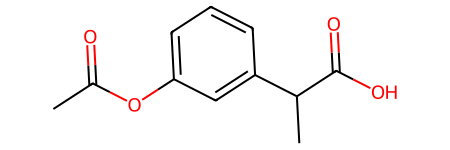

In [16]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC(=C1)C(C)C(=O)O')
print(Chem.MolToSmiles(mol))
mol

In [17]:
import pybel

def iupac_to_smiles(iupac_name):
    mol = pybel.readstring("name", iupac_name)
    return mol.write("smi").strip()

iupac_name = "4-aminobutyric acid"
smiles_string = iupac_to_smiles(iupac_name)
print(f"The SMILES string for {iupac_name} is {smiles_string}")

from py2opsin import py2opsin

smiles_string = py2opsin(
    chemical_name="4-aminobutyric acid",
    output_format="SMILES"
)
print(f"The SMILES string for 4-aminobutyric acid is {smiles_string}")


AttributeError: module 'pybel' has no attribute 'readstring'

In [33]:
import requests
from functools import cache

from urllib.request import urlopen
from urllib.parse import quote
import timeit 

@cache
def iupac_to_smiles1(iupac_name):
    iupac_name = iupac_name.strip()
    if not iupac_name:
        return None
    try:
        url = f'http://cactus.nci.nih.gov/chemical/structure/{iupac_name}/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return iupac_to_smiles1(iupac_name[1:])

@cache
def iupac_to_smiles2(iupac_name):
    iupac_name = iupac_name.strip()
    url = f"https://opsin.ch.cam.ac.uk/opsin/{iupac_name}.smi"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    elif iupac_name:
        return iupac_to_smiles2(iupac_name[1:])
    return None

iupac_name = "(R/S)-4-amino-3-hydroxy butyric acid"
smiles = iupac_to_smiles1(iupac_name)
# print(timeit.timeit(f'iupac_to_smiles1("{iupac_name}")', globals=globals(), number=10))
# print(timeit.timeit(f'iupac_to_smiles2("{iupac_name}")', globals=globals(), number=10))
smiles


'CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2=C1)c34'

In [26]:
import pandas as pd

data = pd.read_csv('SURP-database-reformatted - Flexizymes ready for database.csv', skiprows=1)

SMILES = []
for iupac in data['Monomer Names (required)']:
    method1, method2 = iupac_to_smiles1(iupac), iupac_to_smiles2(iupac)
    SMILES.append({
        'IUPAC': iupac,
        'SMILES1': method1,
        'SMILES2': method2
    })

AttributeError: 'float' object has no attribute 'strip'

In [30]:
# put into new csv
SMILES_df = pd.DataFrame(SMILES)
SMILES_df.to_csv('IUPAC_TO_SMILES.csv')

In [47]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.nature.com/articles/s41557-023-01224-y#Sec26'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# get urls from this page that are hyperlinked with supplementary information

for link in soup.find_all('a'):
    print(link.get('href'))

#content
//pubads.g.doubleclick.net/gampad/jump?iu=/285/nchem.nature.com/article&sz=728x90&c=-463261594&t=pos%3Dtop%26type%3Darticle%26artid%3Ds41557-023-01224-y%26doi%3D10.1038/s41557-023-01224-y%26subjmeta%3D1266,535,552,607,631,92%26kwrd%3DEnzymes,Synthetic+biology,X-ray+crystallography
/nchem
https://www.nature.com/siteindex
#search-menu
https://idp.nature.com/auth/personal/springernature?redirect_uri=https://www.nature.com/articles/s41557-023-01224-y
#explore
#about-the-journal
#publish-with-us
https://www.nature.com/my-account/alerts/subscribe-journal?list-id=190
https://www.nature.com/nchem.rss
/
/nchem
/nchem/articles?type=article
/articles/s41557-023-01224-y.pdf
/articles/s41557-023-01224-y.pdf
https://www.springernature.com/gp/open-research/about/the-fundamentals-of-open-access-and-open-research
#article-info
#auth-Riley-Fricke-Aff1-Aff2
http://orcid.org/0000-0001-9463-6314
#Aff1
#Aff2
#na1
#auth-Cameron_V_-Swenson-Aff1-Aff2
http://orcid.org/0000-0002-9896-3539
#Aff1
#Aff2
#n